# Astropy
December 3, 2019

Laura V. Trujillo T

[lvtrujillot@unal.edu.co](lvtrujillot@unal.edu.co)

In [15]:
from astropy.utils.data import download_file
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib inline

### Exercise 1

In [16]:
image_file = download_file("http://data.astropy.org/tutorials/FITS-images/HorseHead.fits", cache=True)

In [25]:
hdu = fits.open(image_file)
hdu.info()

Filename: /home/ltt/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


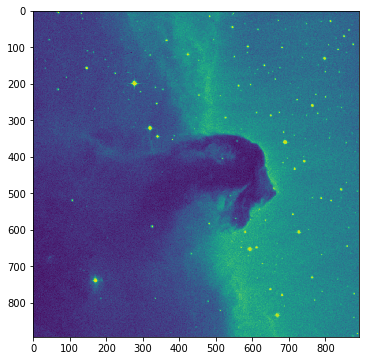

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(hdu[0].data)
plt.show()

`hdu[0]`contains `.data`and `.header`. The `.header` shows all info of the data (where it was obtained and so on)
```python
hdu[0].header
```

### Exercise 2: Astropy Coordinates

In [33]:
from astropy.coordinates import SkyCoord
from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image
import astropy.units as u

In [34]:
c = SkyCoord.from_name("CRAB")
c

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63308333, 22.0145)>

In [69]:
Fuente = SkyCoord.from_name("NGC234")
print("Coordinates", Fuente)

Coordinates <SkyCoord (ICRS): (ra, dec) in deg
    (10.88492342, 14.34260824)>


In [70]:
im_size = 12 * u.arcmin
im_pixels = 1024
urlCutOut = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=Fuente.ra.deg,
                              dec=Fuente.dec.deg,
                              width=im_pixels, height=im_pixels,
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = urlCutOut + '?' + query_string

In [71]:
urlretrieve(url, "NGC234.jpg")

('NGC234.jpg', <http.client.HTTPMessage at 0x7f4d621e30f0>)

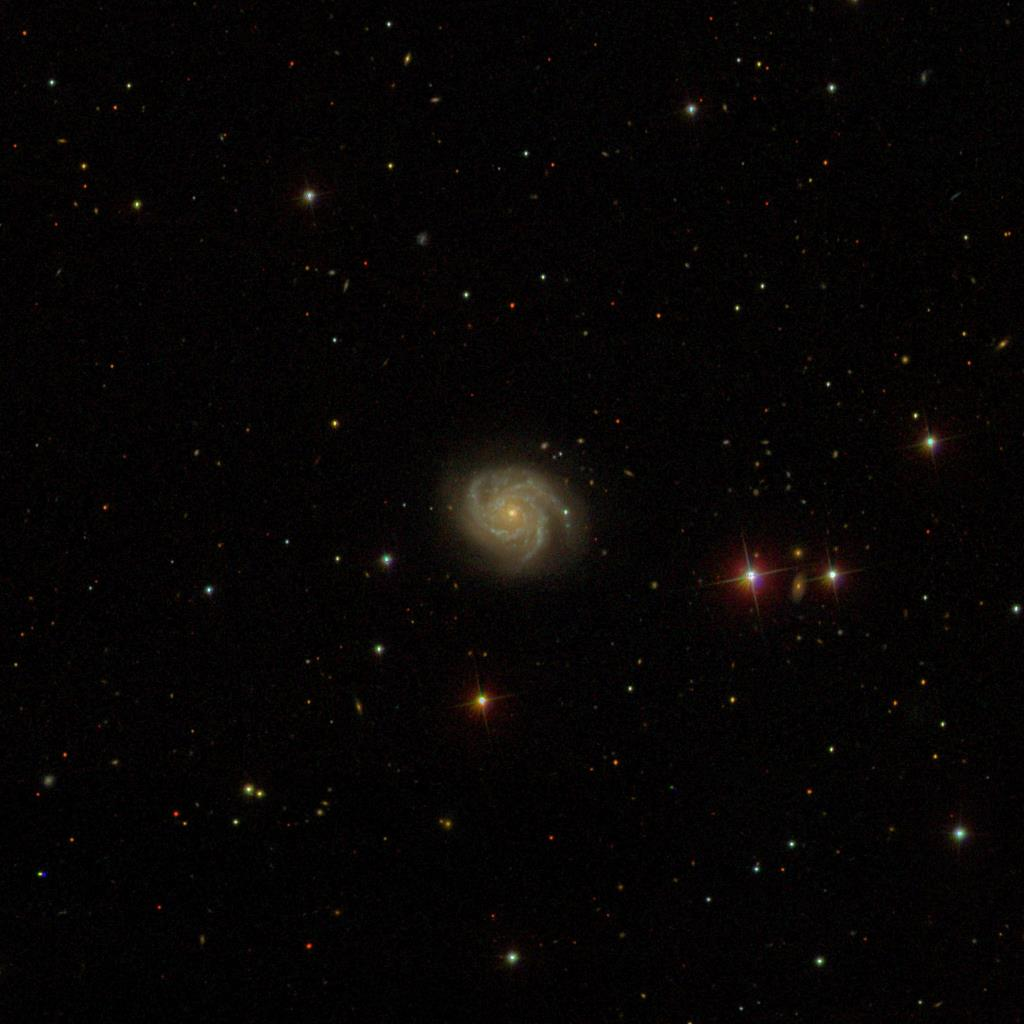

In [72]:
Image("NGC234.jpg")

### Example 3: Astropy Units
